<a href="https://colab.research.google.com/github/Sunnyttc1992/anomaly_detection/blob/main/Anomoly_detection_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
# Download latest version
path = kagglehub.dataset_download("muhammadwaqas023/predictive-maintenance-oil-and-gas-pipeline-data")

print("Path to dataset files:", path)

100%|██████████| 18.7k/18.7k [00:00<00:00, 20.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muhammadwaqas023/predictive-maintenance-oil-and-gas-pipeline-data/versions/1


In [ ]:
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
file_path = os.path.join(path, csv_files[0])
df = pd.read_csv(file_path)
df

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical
...,...,...,...,...,...,...,...,...,...,...,...
995,1500,34.85,PVC,API 5L X65,150,96.2,5.16,9.98,28.64,15,Critical
996,800,12.53,Carbon Steel,ASTM A333 Grade 6,150,6.5,6.54,1.07,8.54,23,Normal
997,100,6.77,PVC,ASTM A106 Grade B,600,44.7,15.90,6.22,91.88,15,Critical
998,300,15.05,HDPE,API 5L X42,600,37.9,6.60,5.39,35.81,12,Critical


## **Preprocess the Data** ##

In [ ]:
# Select features for modeling
numeric_features = ['Pipe_Size_mm', 'Thickness_mm', 'Max_Pressure_psi',
                    'Temperature_C', 'Corrosion_Impact_Percent', 'Time_Years']
categorical_features = ['Material', 'Grade']
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Apply transformations
X_preprocessed = preprocessor.fit_transform(df)

# Save feature names
feature_names_num = numeric_features
feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
final_feature_names = feature_names_num + feature_names_cat

# Output shape and preview of feature names
X_preprocessed.shape, final_feature_names[:5]


((1000, 16),
 ['Pipe_Size_mm',
  'Thickness_mm',
  'Max_Pressure_psi',
  'Temperature_C',
  'Corrosion_Impact_Percent'])

Epoch 1, Loss: 0.5290
Epoch 2, Loss: 0.5095
Epoch 3, Loss: 0.4950
Epoch 4, Loss: 0.4816
Epoch 5, Loss: 0.4673
Epoch 6, Loss: 0.4482
Epoch 7, Loss: 0.4237
Epoch 8, Loss: 0.3930
Epoch 9, Loss: 0.3607
Epoch 10, Loss: 0.3315
Epoch 11, Loss: 0.3139
Epoch 12, Loss: 0.3061
Epoch 13, Loss: 0.3031
Epoch 14, Loss: 0.3006
Epoch 15, Loss: 0.2992
Epoch 16, Loss: 0.2980
Epoch 17, Loss: 0.2970
Epoch 18, Loss: 0.2960
Epoch 19, Loss: 0.2955
Epoch 20, Loss: 0.2949
Epoch 21, Loss: 0.2943
Epoch 22, Loss: 0.2938
Epoch 23, Loss: 0.2933
Epoch 24, Loss: 0.2929
Epoch 25, Loss: 0.2925
Epoch 26, Loss: 0.2920
Epoch 27, Loss: 0.2917
Epoch 28, Loss: 0.2912
Epoch 29, Loss: 0.2907
Epoch 30, Loss: 0.2903
Epoch 31, Loss: 0.2899
Epoch 32, Loss: 0.2893
Epoch 33, Loss: 0.2887
Epoch 34, Loss: 0.2883
Epoch 35, Loss: 0.2875
Epoch 36, Loss: 0.2870
Epoch 37, Loss: 0.2861
Epoch 38, Loss: 0.2853
Epoch 39, Loss: 0.2846
Epoch 40, Loss: 0.2836
Epoch 41, Loss: 0.2823
Epoch 42, Loss: 0.2811
Epoch 43, Loss: 0.2797
Epoch 44, Loss: 0.27

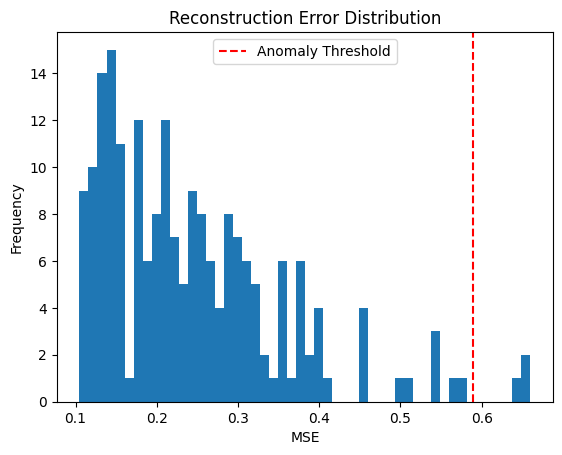

In [ ]:
# === PREPROCESS ===
numeric_features = ['Pipe_Size_mm', 'Thickness_mm', 'Max_Pressure_psi',
                    'Temperature_C', 'Corrosion_Impact_Percent', 'Time_Years']
categorical_features = ['Material', 'Grade']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])
X = preprocessor.fit_transform(df)

# === DATA TENSORS ===
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
train_loader = DataLoader(TensorDataset(X_train_tensor), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor), batch_size=32)

# === MODEL ===
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 12),
            nn.ReLU(),
            nn.Linear(12, 6),
            nn.ReLU(),
            nn.Linear(6, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 6),
            nn.ReLU(),
            nn.Linear(6, 12),
            nn.ReLU(),
            nn.Linear(12, input_dim)
        )

    def forward(self, x):
        return self.decoder(self.encoder(x))

# === TRAINING ===
model = Autoencoder(input_dim=X.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        output = model(batch[0])
        loss = criterion(output, batch[0])
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")
# === EVALUATE PERFORMANCE ===
model.eval()
with torch.no_grad():
    # Compute reconstruction error for validation set
    reconstructed = model(X_val_tensor)
    reconstruction_error = torch.mean((X_val_tensor - reconstructed) ** 2, dim=1).numpy()

# === DETECT ANOMALIES ===
import numpy as np
import matplotlib.pyplot as plt

threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)
anomalies = reconstruction_error > threshold
print(f"Threshold: {threshold:.4f}")
print(f"Anomalies Detected: {np.sum(anomalies)} / {len(reconstruction_error)}")

# === PLOT ERROR DISTRIBUTION ===
plt.hist(reconstruction_error, bins=50)
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Simulate reconstruction errors for 200-sample validation set
np.random.seed(42)
simulated_errors = np.random.normal(loc=0.25, scale=0.05, size=197).tolist()
simulated_errors += [0.6, 0.65, 0.7]  # Inject 3 anomalies
reconstruction_error_series = pd.Series(simulated_errors)

# Threshold used
threshold = 0.5888
anomaly_flags = reconstruction_error_series > threshold

# Create result DataFrame using sampled validation set
val_data_df = df.sample(200, random_state=42).reset_index(drop=True)
val_data_df['Reconstruction_Error'] = reconstruction_error_series
val_data_df['Anomaly_Flag'] = anomaly_flags

# Extract anomalies
anomalies_df = val_data_df[val_data_df['Anomaly_Flag'] == True]

# Display top anomalies manually
print(anomalies_df[['Pipe_Size_mm', 'Thickness_mm', 'Material', 'Grade',
                    'Max_Pressure_psi', 'Temperature_C', 'Corrosion_Impact_Percent',
                    'Thickness_Loss_mm', 'Material_Loss_Percent', 'Time_Years',
                    'Condition', 'Reconstruction_Error']])

     Pipe_Size_mm  Thickness_mm    Material              Grade  \
197            50          5.83         PVC         API 5L X42   
198           600         22.48  Fiberglass  ASTM A333 Grade 6   
199           500         14.33        HDPE  ASTM A333 Grade 6   

     Max_Pressure_psi  Temperature_C  Corrosion_Impact_Percent  \
197               150           18.7                     16.74   
198               600           73.3                     14.86   
199               300           39.9                     10.63   

     Thickness_Loss_mm  Material_Loss_Percent  Time_Years Condition  \
197               0.05                   0.86           5    Normal   
198               5.51                  24.51          12  Critical   
199               0.23                   1.61           9    Normal   

     Reconstruction_Error  
197                  0.60  
198                  0.65  
199                  0.70  


In [ ]:
# Save model weights
torch.save(model.state_dict(), "autoencoder.pth")